In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn 


In [2]:
df=pd.read_csv(r'E:project/train.csv')
test=pd.read_csv(r'E:project/test.csv')

In [9]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [10]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
ID            31647 non-null int64
age           31647 non-null int64
job           31647 non-null object
marital       31647 non-null object
education     31647 non-null object
default       31647 non-null object
balance       31647 non-null int64
housing       31647 non-null object
loan          31647 non-null object
contact       31647 non-null object
day           31647 non-null int64
month         31647 non-null object
duration      31647 non-null int64
campaign      31647 non-null int64
pdays         31647 non-null int64
previous      31647 non-null int64
poutcome      31647 non-null object
subscribed    31647 non-null object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [19]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


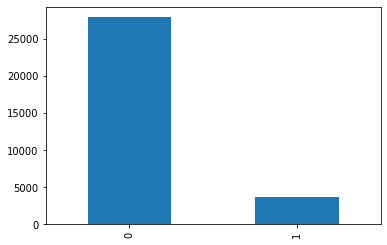

In [53]:
_=df['subscribed'].value_counts().plot.bar()

In [21]:
df['subscribed'].value_counts(normalize =True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

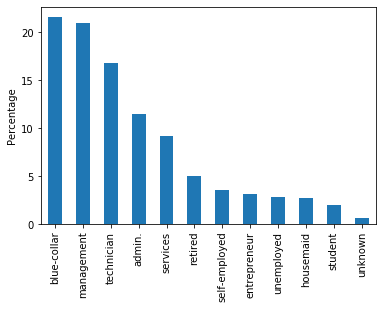

In [54]:
(df['job'].value_counts(normalize=True)*100).plot(kind='bar')
_=plt.ylabel('Percentage')

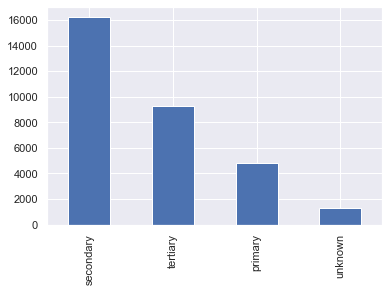

In [51]:
df['education'].value_counts().plot(kind='bar')

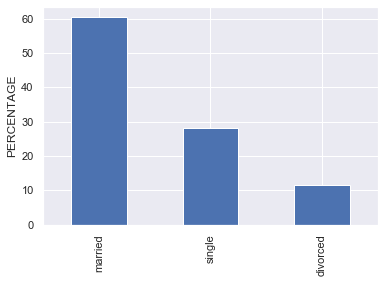

In [61]:
(df['marital'].value_counts(normalize=True)*100).plot(kind='bar')
_=plt.ylabel('PERCENTAGE')

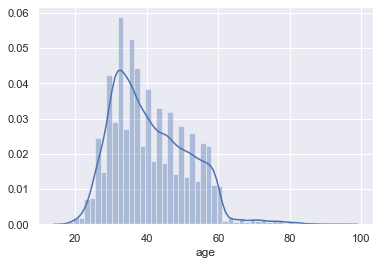

In [67]:
_=sn.distplot(df['age'])

In [78]:
df.groupby('education')['subscribed'].value_counts(normalize=True)*100

education  subscribed
primary    no            91.118968
           yes            8.881032
secondary  no            89.540187
           yes           10.459813
tertiary   no            84.786582
           yes           15.213418
unknown    no            86.605784
           yes           13.394216
Name: subscribed, dtype: float64

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


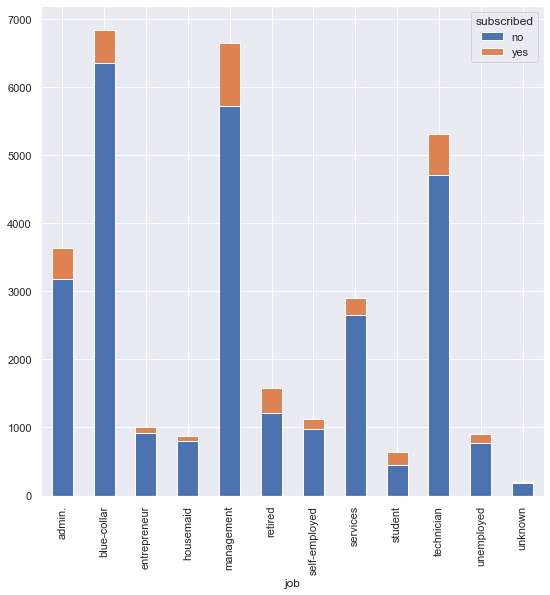

In [91]:
print(pd.crosstab(df['job'],df['subscribed']))
_=pd.crosstab(df['job'],df['subscribed']).plot(kind='bar',stacked=True,figsize=(9,9))


In [14]:
d=pd.crosstab(df['default'],df['subscribed'])
d

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


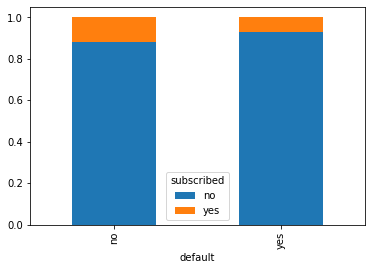

In [13]:
d.div(d.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

In [17]:
df['subscribed'].replace('no', 0,inplace=True)
df['subscribed'].replace('yes', 1,inplace=True)

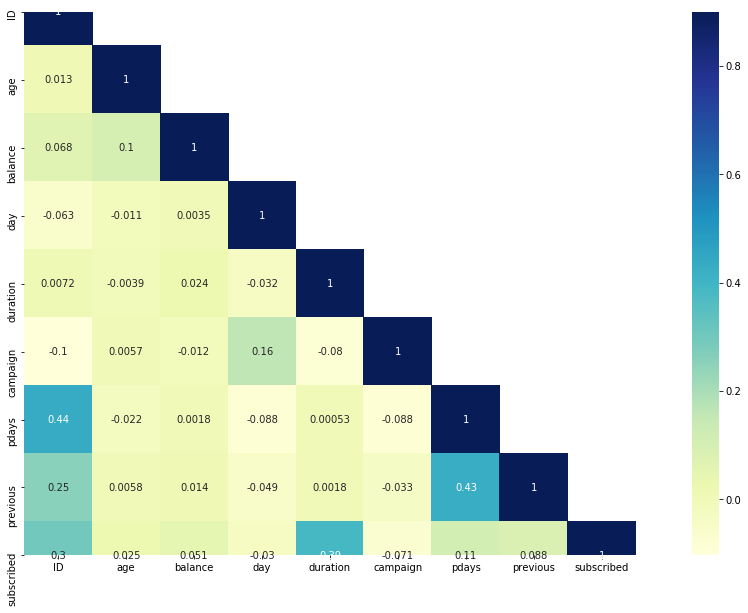

In [26]:
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)

_=sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [31]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split`

In [36]:
target = df['subscribed']
train = df.drop('subscribed',1)

In [38]:
train=pd.get_dummies(train)

In [39]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

In [40]:
lreg=LogisticRegression()

In [41]:
lreg.fit(X_train,y_train)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
pred=lreg.predict(X_val)

In [46]:
accuracy_score(y_val,pred)

0.9003159557661927

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [49]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [50]:
pred=clf.predict(X_val)

In [51]:
accuracy_score(pred,y_val)

0.9042654028436019